In [1]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/indian-currency-notes-classifier/Train'
valid_path = '../input/indian-currency-notes-classifier/Test'

In [3]:
# useful for getting number of output classes
folders = glob('../input/indian-currency-notes-classifier/Train/*')

In [4]:
folders

['../input/indian-currency-notes-classifier/Train/Twentynote',
 '../input/indian-currency-notes-classifier/Train/1Hundrednote',
 '../input/indian-currency-notes-classifier/Train/5Hundrednote',
 '../input/indian-currency-notes-classifier/Train/2Hundrednote',
 '../input/indian-currency-notes-classifier/Train/Tennote',
 '../input/indian-currency-notes-classifier/Train/Fiftynote',
 '../input/indian-currency-notes-classifier/Train/2Thousandnote']

In [5]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [6]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/indian-currency-notes-classifier/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [9]:
test_set = test_datagen.flow_from_directory('../input/indian-currency-notes-classifier/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [10]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 8.8181 - accuracy: 0.1765

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 10s 2s/step - loss: 8.8181 - accuracy: 0.1765 - val_loss: 4.8947 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 2.7357 - accuracy: 0.1438 - val_loss: 1.9415 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 1.9357 - accuracy: 0.1765 - val_loss: 1.9374 - val_accuracy: 0.1667
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 1.8910 - accuracy: 0.2092 - val_loss: 1.8048 - val_accuracy: 0.2143
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 1.8241 - accuracy: 0.2288 - val_loss: 1.8457 - val_accuracy: 0.1429
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 1.7854 - accuracy: 0.2092 - val_loss: 1.6578 - val_accuracy: 0.1905
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 1.6384 - accuracy: 0.2745 - val_loss: 1.6935 - val_accuracy: 0.2619
Epoch 8/50
5/5 [==============================] - 9

In [11]:
r.history

{'loss': [8.818099975585938,
  2.735687732696533,
  1.935699224472046,
  1.8910462856292725,
  1.8241138458251953,
  1.7853567600250244,
  1.638368010520935,
  1.5452288389205933,
  1.3935552835464478,
  1.1832778453826904,
  1.3296334743499756,
  1.1283107995986938,
  1.027389645576477,
  0.9005032181739807,
  0.7751530408859253,
  0.760955274105072,
  0.7977767586708069,
  0.790120542049408,
  0.6731151938438416,
  0.6350079774856567,
  0.5736333727836609,
  0.5040937066078186,
  0.501559853553772,
  0.36476829648017883,
  0.5077463388442993,
  0.4473278522491455,
  0.4130736291408539,
  0.3537483513355255,
  0.4400569796562195,
  0.28774401545524597,
  0.3900737464427948,
  0.3492547571659088,
  0.40227872133255005,
  0.34503763914108276,
  0.4138130247592926,
  0.3653129041194916,
  0.2852841019630432,
  0.22214801609516144,
  0.1873137503862381,
  0.2581303119659424,
  0.1852278858423233,
  0.19943568110466003,
  0.1608322411775589,
  0.1365717500448227,
  0.1584586650133133,
  0.

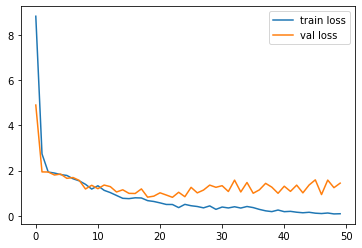

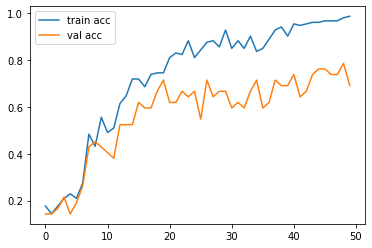

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [14]:
y_pred = Classifier.predict(test_set)

In [15]:
y_pred

array([[3.30632565e-06, 9.78272319e-01, 6.17548039e-08, 1.08715416e-04,
        4.32863380e-05, 2.09147483e-02, 6.57655590e-04],
       [1.13293902e-06, 4.75789541e-09, 2.38911039e-12, 2.98509550e-10,
        7.31669545e-01, 2.35656068e-01, 3.26732509e-02],
       [9.33387458e-01, 2.72459052e-11, 1.89986094e-05, 1.10201436e-04,
        6.64692894e-02, 1.32600944e-05, 7.91546825e-07],
       [1.23432656e-07, 5.27263939e-01, 4.83017862e-11, 2.05906508e-05,
        5.59367663e-07, 1.21005572e-01, 3.51709157e-01],
       [6.88178814e-04, 2.60941734e-16, 6.42392769e-14, 4.42697148e-13,
        9.99311566e-01, 8.04448508e-09, 2.29730730e-07],
       [1.48629897e-05, 1.42222814e-16, 2.05268779e-14, 2.97595178e-11,
        9.99983668e-01, 1.43843351e-06, 3.27756879e-08],
       [4.45764073e-07, 3.31081860e-02, 1.97770758e-11, 1.01486025e-02,
        8.23166374e-06, 7.40464211e-01, 2.16270313e-01],
       [1.10122231e-08, 9.37089026e-01, 2.11458961e-10, 5.42080670e-07,
        6.02206143e-08, 2

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [17]:
y_pred

array([1, 4, 0, 1, 4, 4, 5, 1, 0, 6, 4, 2, 0, 4, 1, 6, 5, 5, 0, 0, 4, 5,
       5, 5, 4, 2, 3, 4, 2, 0, 1, 2, 5, 6, 4, 4, 0, 4, 2, 6, 4, 6])

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('model_Classifier.h5')

In [20]:
img=image.load_img('../input/indian-currency-notes-classifier/Test/1Hundrednote/1.jpg',target_size=(224,224))

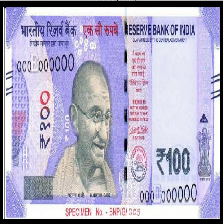

In [21]:
img

In [22]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [23]:
result = Classifier.predict(test_image)
result

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
a=np.argmax(model.predict(test_image), axis=1)

In [25]:
a==5

array([False])

In [26]:
a==0

array([ True])